# Set simulatin parameters, run simulation and save pickle file for all mc's of each model 

- 2021-06-16
- Plot online-return.pdf and online-regret.pdf

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

import pickle
import os

In /Users/elynncc/anaconda3/envs/research/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/elynncc/anaconda3/envs/research/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/elynncc/anaconda3/envs/research/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/elynncc/anaconda3/envs/research/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [2]:
# personal library

import MDP_CHAK10
import QLearning as QL
import TransferLinearModel as TLM
import TransferQLearning as TQL

In [3]:
horizon = 2
dim_tru = 8
r2_coef_tar = np.ones(dim_tru)
r2_coef_tar[-1] = 0
r2_coef_aux = np.ones(dim_tru)
r2_coef_aux[-1] = 0

diff = 1
# r2_coef_aux[1] += diff

# Setting difference in [3] will result in the growing effect in the pink line 
# diff = .2 will be too small
r2_coef_aux[3] += diff


In [4]:
DATA_DIR = 'data/'
RES_DIR = 'res/'

In [5]:
dim_obs = 80

num_obs_aux = 100

distn = 'n'

In [6]:
_SEED = 7777
seed = _SEED
np.random.seed(seed)

# Generate off-line data from task-1
mdp = MDP_CHAK10.MDP_CHAK10(dim_obs, noise_var=1)

# Auxilliary task
mdp.set_r2_coef(r2_coef_aux)
traj_aux = mdp.sample_random_obs(num_obs_aux, distn)
q_coef_aux_tru = mdp.get_Q_coef()

# Target task
mdp.set_r2_coef(r2_coef_tar)

q_coef_tar_singl = None
q_coef_tar_trans = QL.Lasso(traj_aux, max_iter=5000, CV=True)  
q_coef_tar_tru = mdp.get_Q_coef()


In [7]:
## 1, S1, A1, S1A1, A2, S2A2, A1A2, S2
np.round(np.hstack([q_coef_tar_tru[:8,:], q_coef_aux_tru[:8,:], q_coef_tar_trans[:8,:]]), 2)

array([[ 2.69,  1.  ,  2.69,  1.  ,  0.75,  0.  ],
       [ 1.19,  1.  ,  1.19,  1.  ,  1.04,  1.06],
       [ 1.69,  1.  ,  1.69,  1.  ,  1.7 ,  0.96],
       [ 1.19,  1.  ,  2.19,  2.  ,  1.81,  1.74],
       [ 0.  ,  1.  ,  0.  ,  1.  ,  0.01,  1.01],
       [ 0.  ,  1.  ,  0.  ,  1.  , -0.04,  0.64],
       [ 0.  ,  1.  ,  0.  ,  1.  , -0.  ,  1.1 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.26,  0.  ]])

In [8]:
batch_size = 500
num_epoch = 25

In [9]:
obs = mdp.reset(batch_size)
act_0 = mdp.greedy(q_coef_tar_trans)
obs_next, rew, done = mdp.step(act_0)
act_1 = mdp.greedy(q_coef_tar_trans)
obs_next_1, rew_1, done_1 = mdp.step(act_1)

In [10]:
np.mean(mdp.reward[:,-1])

2.6358157565489773

In [11]:
traj = mdp.sample_random_obs(num_obs=500, distn='n')

In [12]:
np.mean(traj['rew'][:,-1])

1.0439604136431089

In [13]:
obs = mdp.reset(batch_size)
act_0 = mdp.greedy(q_coef_tar_tru)
obs_next, rew, done = mdp.step(act_0)
act_1 = mdp.greedy(q_coef_tar_tru)
obs_next_1, rew_1, done_1 = mdp.step(act_1)

In [14]:
np.mean(mdp.reward[:,-1])

3.791200361662664

In [15]:
#################
batch_size = 100
num_epoch = 50

In [16]:
seed = _SEED
np.random.seed(seed)

reward_opt = np.zeros(num_epoch)

for ep in np.arange(num_epoch):
    print('Running epoch #'+str(ep))
    
    obs = mdp.reset(batch_size)
    mdp.step(mdp.greedy(q_coef_tar_tru))
    mdp.step(mdp.greedy(q_coef_tar_tru))
    reward_opt[ep] = np.mean(mdp.reward[:,-1])

print("Done!")

Running epoch #0
Running epoch #1
Running epoch #2
Running epoch #3
Running epoch #4
Running epoch #5
Running epoch #6
Running epoch #7
Running epoch #8
Running epoch #9
Running epoch #10
Running epoch #11
Running epoch #12
Running epoch #13
Running epoch #14
Running epoch #15
Running epoch #16
Running epoch #17
Running epoch #18
Running epoch #19
Running epoch #20
Running epoch #21
Running epoch #22
Running epoch #23
Running epoch #24
Running epoch #25
Running epoch #26
Running epoch #27
Running epoch #28
Running epoch #29
Running epoch #30
Running epoch #31
Running epoch #32
Running epoch #33
Running epoch #34
Running epoch #35
Running epoch #36
Running epoch #37
Running epoch #38
Running epoch #39
Running epoch #40
Running epoch #41
Running epoch #42
Running epoch #43
Running epoch #44
Running epoch #45
Running epoch #46
Running epoch #47
Running epoch #48
Running epoch #49
Done!


In [17]:
betas_0 = None

traj_0 = None

seed = _SEED
np.random.seed(seed)

reward = np.zeros(num_epoch)

for ep in np.arange(num_epoch):
    print('Running epoch #'+str(ep))
    
    if ep == 0 and betas_0 is None:
        traj_1 = mdp.sample_random_obs(num_obs=batch_size, distn='n')
        reward[ep] = np.mean(traj_1['rew'][:,-1])
    else: 
        obs = mdp.reset(batch_size)
        mdp.step(mdp.greedy(betas_0))
        mdp.step(mdp.greedy(betas_0))
        reward[ep] = np.mean(mdp.reward[:,-1])

        traj_1 = mdp.add_new_traj(traj_0)
        
    
    betas_1 = QL.Lasso(traj_1) 
    del betas_0
    del traj_0
    betas_0 = betas_1
    traj_0 = traj_1 

print("Done!")

Running epoch #0
Running epoch #1
Running epoch #2
Running epoch #3
Running epoch #4
Running epoch #5
Running epoch #6
Running epoch #7
Running epoch #8
Running epoch #9
Running epoch #10
Running epoch #11
Running epoch #12
Running epoch #13
Running epoch #14
Running epoch #15
Running epoch #16
Running epoch #17
Running epoch #18
Running epoch #19
Running epoch #20
Running epoch #21
Running epoch #22
Running epoch #23
Running epoch #24
Running epoch #25
Running epoch #26
Running epoch #27
Running epoch #28
Running epoch #29
Running epoch #30
Running epoch #31
Running epoch #32
Running epoch #33
Running epoch #34
Running epoch #35
Running epoch #36
Running epoch #37
Running epoch #38
Running epoch #39
Running epoch #40
Running epoch #41
Running epoch #42
Running epoch #43
Running epoch #44
Running epoch #45
Running epoch #46
Running epoch #47
Running epoch #48
Running epoch #49
Done!


In [18]:
reward0 = reward

In [19]:

betas_0 = q_coef_tar_trans
traj_0 = None
traj_aux = traj

seed = _SEED
np.random.seed(seed)

reward = np.zeros(num_epoch)

assert betas_0 is not None

for ep in np.arange(num_epoch):
    print('Running epoch #'+str(ep))

    obs = mdp.reset(batch_size)
    mdp.step(mdp.greedy(betas_0))
    mdp.step(mdp.greedy(betas_0))
    reward[ep] = np.mean(mdp.reward[:,-1])

    traj_1 = mdp.add_new_traj(traj_0)
    betas_1, _ = TQL.Lasso(traj_1, traj_aux)
    
    del betas_0
    del traj_0
    betas_0 = betas_1
    traj_0 = traj_1 

print("Done!")

Running epoch #0
Running epoch #1
Running epoch #2
Running epoch #3
Running epoch #4
Running epoch #5
Running epoch #6
Running epoch #7
Running epoch #8
Running epoch #9
Running epoch #10
Running epoch #11
Running epoch #12
Running epoch #13
Running epoch #14
Running epoch #15
Running epoch #16
Running epoch #17
Running epoch #18
Running epoch #19
Running epoch #20
Running epoch #21
Running epoch #22
Running epoch #23
Running epoch #24
Running epoch #25
Running epoch #26
Running epoch #27
Running epoch #28
Running epoch #29
Running epoch #30
Running epoch #31
Running epoch #32
Running epoch #33
Running epoch #34
Running epoch #35
Running epoch #36
Running epoch #37
Running epoch #38
Running epoch #39
Running epoch #40
Running epoch #41
Running epoch #42
Running epoch #43
Running epoch #44
Running epoch #45
Running epoch #46
Running epoch #47
Running epoch #48
Running epoch #49
Done!


In [20]:
reward1 = reward

In [105]:
obs = mdp.reset(batch_size)
act_0 = mdp.greedy(betas_0)
obs_next, rew, done = mdp.step(act_0)
act_1 = mdp.greedy(betas_0)
obs_next_1, rew_1, done_1 = mdp.step(act_1)

In [106]:
np.mean(mdp.reward[:,-1])

3.7236592394675285

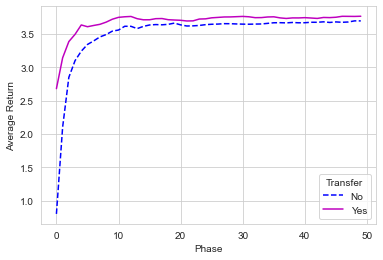

In [27]:
sns.set_style('whitegrid')
fig, axe = plt.subplots()

plt.plot(np.arange(num_epoch), np.cumsum(reward0)/np.arange(1,num_epoch+1), 'b--', label='No')
plt.plot(np.arange(num_epoch), np.cumsum(reward1)/np.arange(1,num_epoch+1), 'm-', label='Yes')

#sns.lineplot(np.arange(num_epoch), np.cumsum(reward0)/np.arange(1,num_epoch+1), ax = axe)
#sns.lineplot(np.arange(num_epoch), np.cumsum(reward1)/np.arange(1,num_epoch+1), ax = axe)

axe.set_ylabel("Average Return")
axe.set_xlabel("Phase")

axe.legend(title="Transfer", loc="lower right")

plt.savefig(os.path.join(RES_DIR, 'online-return.pdf'), bbox_inches='tight')

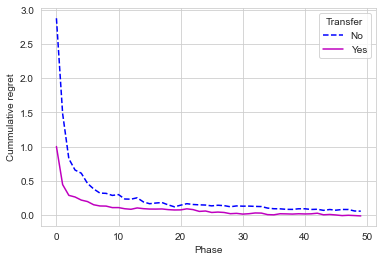

In [26]:
sns.set_style('whitegrid')
fig, axe = plt.subplots()

#plt.plot(np.arange(0,num_epoch*batch_size,batch_size), np.cumsum(reward_opt-reward0)/np.arange(1,num_epoch+1), 'b--', label='No')
#plt.plot(np.arange(0,num_epoch*batch_size,batch_size), np.cumsum(reward_opt-reward1)/np.arange(1,num_epoch+1), 'm-', label='Yes')

plt.plot(np.arange(num_epoch), np.cumsum(reward_opt-reward0)/np.arange(1,num_epoch+1), 'b--', label='No')
plt.plot(np.arange(num_epoch), np.cumsum(reward_opt-reward1)/np.arange(1,num_epoch+1), 'm-', label='Yes')

#sns.lineplot(np.arange(num_epoch), np.cumsum(reward0)/np.arange(1,num_epoch+1), ax = axe)
#sns.lineplot(np.arange(num_epoch), np.cumsum(reward1)/np.arange(1,num_epoch+1), ax = axe)

axe.set_ylabel("Cummulative regret")
axe.set_xlabel("Phase")

axe.legend(title="Transfer", loc="upper right")

#plt.savefig(os.path.join(RES_DIR, 'online-regret.pdf'), bbox_inches='tight')

In [109]:
np.hstack([reward0[:,None], reward1[:,None]])

array([[0.8007149 , 2.68166923],
       [3.40570162, 3.6061909 ],
       [4.34720824, 3.8766885 ],
       [3.85327247, 3.82289131],
       [3.81063989, 4.20071674],
       [3.85067246, 3.47849168],
       [3.7196943 , 3.74306738],
       [3.87570316, 3.7662365 ],
       [3.77497011, 3.94154258],
       [4.0095168 , 4.11952294],
       [3.72757083, 4.03449863],
       [4.23889486, 3.85453967],
       [3.60879957, 3.82254725],
       [3.13731504, 3.29487268],
       [4.08179222, 3.48385531],
       [3.95404421, 3.72093975],
       [3.7406538 , 3.99683424],
       [3.5807323 , 3.76634937],
       [3.77547476, 3.40136162],
       [4.0134179 , 3.62063201],
       [3.10896828, 3.62790212],
       [3.2655669 , 3.47820969],
       [3.67343497, 3.74185188],
       [3.77125532, 4.35141255],
       [3.92335498, 3.80112251],
       [3.80237736, 4.13007923],
       [3.71916403, 3.90949193],
       [3.82500778, 3.93249183],
       [3.64159876, 3.78194619],
       [3.54428712, 3.87008926],
       [3.